In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Training Data EDA

In [2]:
df = pd.read_csv('../input/bt5153-applied-machine-learning-2021-spring/train.csv')
df.head()

,Outcome,Text,Id
0,14,I am having a problem with the first example o...,1
1,14,"everyone, I met a tough definite integral as f...",2
2,7,"Please dont lynch me, but i've never sat throu...",3
3,14,How to calculate $ \mathbb{Z}[x] /\langle2x-1\...,4
4,2,When somebody rings or texts my iPhone it is n...,5


In [3]:
df_gb_class = df.groupby(['Outcome']).count().iloc[:,:1].rename(columns={'Text':'count'}).reset_index()
df_gb_class['percentage'] = df_gb_class['count'] / sum(df_gb_class['count'])
df_gb_class.head()

,Outcome,count,percentage
0,0,24428,2.56e-02
1,1,31270,3.27e-02
2,2,47268,4.95e-02
3,3,20200,2.11e-02
4,4,6108,6.39e-03


In [4]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [5]:
def dual_y_barplot(x, y1, y2):
    """Get a bar plot with double y axis."""
    width = 0.8    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    plot = ax1.bar(x, y1, width)
    ax1.set_xticks(range(16))
    ax1.yaxis.get_major_formatter().set_powerlimits((0,1))
    ax1.tick_params(labelsize=12)
    ax1.set_xlabel('class', fontsize=14)
    ax1.set_ylabel('count', fontsize=14)
    ax2 = ax1.twinx() 
    ax2.bar(x, y2, width)
    ax2.set_ylabel('percentage', fontsize=14)
    autolabel(plot, ax1)

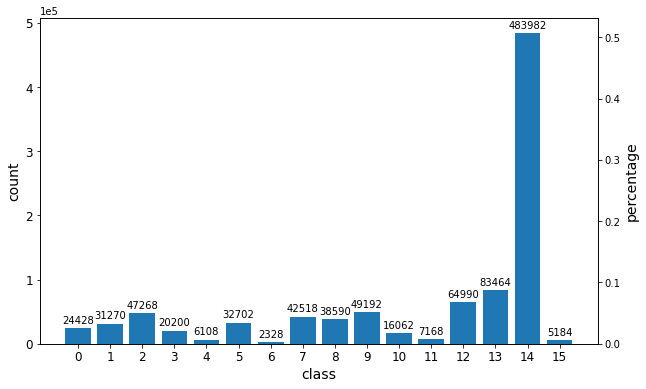

In [6]:
dual_y_barplot(df_gb_class['Outcome'], df_gb_class['count'], df_gb_class['percentage'])

## Base Case Prediction Labels EDA

In [7]:
df_base_out = pd.read_csv('../input/base-raw-balance-nb-0312-v0/output.csv')
df_base_class = df_base_out.groupby(['Outcome']).count().iloc[:,:1].rename(columns={'Id':'count'}).reset_index()
df_base_class['percentage'] = df_base_class['count'] / sum(df_base_class['count'])
df_base_class.head()

,Outcome,count,percentage
0,0,1354,2.45e-03
1,1,17440,3.16e-02
2,2,10397,1.88e-02
3,3,22019,3.98e-02
4,4,19916,3.60e-02


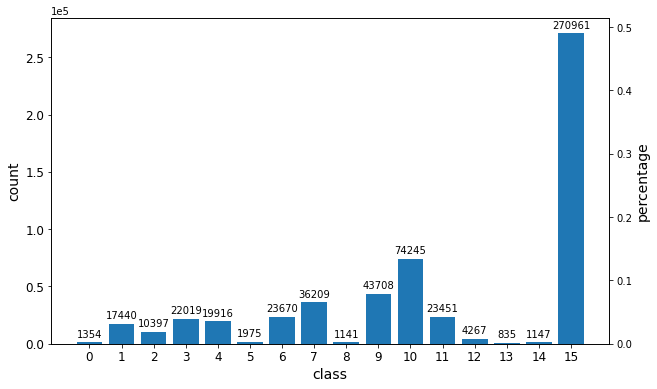

In [8]:
dual_y_barplot(df_base_class['Outcome'], df_base_class['count'], df_base_class['percentage'])

## Boxplots for Created Features

In [9]:
df_feat = pd.read_csv('../input/train-all-data-feat/df_train_all_feat.csv')
feat_columns = ['adj_density', 'num_char_density', 'num_word_count', 'pron_density', 'verb_density']
columns = feat_columns + ['Outcome', 'Text', 'Id']
df_feat = df_feat[columns]
df_feat.head()

,adj_density,num_char_density,num_word_count,pron_density,verb_density,Outcome,Text,Id
0,0.22,0.10,0,0.04,0.12,14,I am having a problem with the first example o...,1
1,0.24,0.05,0,0.05,0.24,14,"everyone, I met a tough definite integral as f...",2
2,0.22,0.06,3,0.04,0.22,7,"Please dont lynch me, but i've never sat throu...",3
3,0.12,0.29,0,0.00,0.12,14,How to calculate $ \mathbb{Z}[x] /\langle2x-1\...,4
4,0.00,0.00,0,0.14,0.22,2,When somebody rings or texts my iPhone it is n...,5


In [10]:
def get_box_plot(data, x, y):
    """Get a box plot"""
    fig, ax = plt.subplots(figsize=(10, 6))
    ax=sns.boxplot(x=x,y=y,data=data)
    if y != 'num_word_count':
        ax.set_ylim([0, 1])
    else:
        ax.set_ylim([0, 1000])
    plt.show()

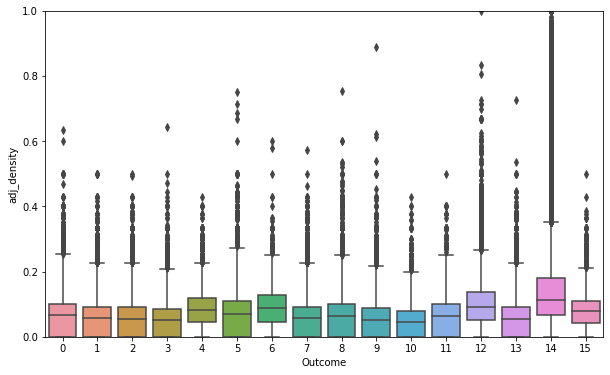

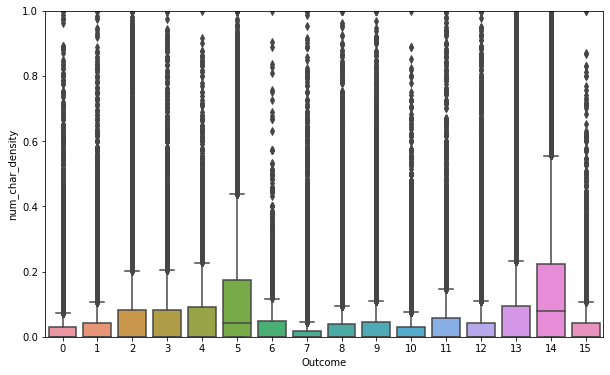

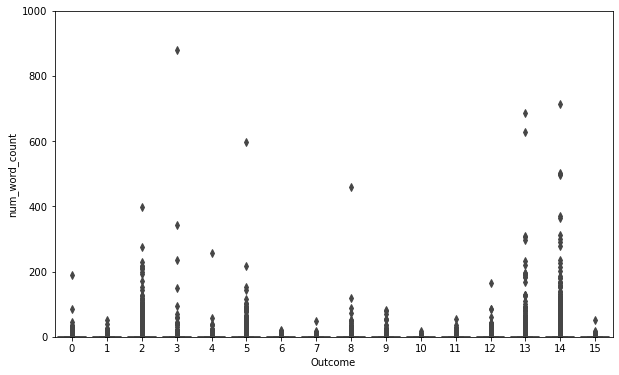

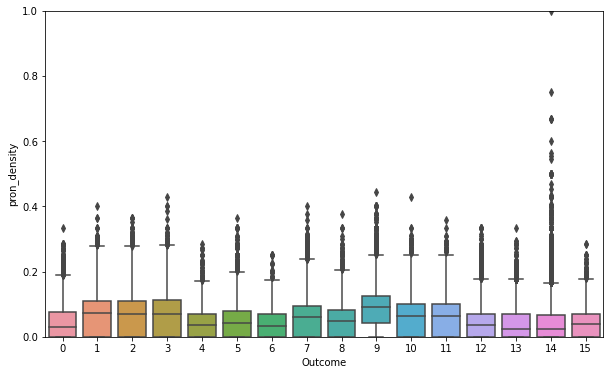

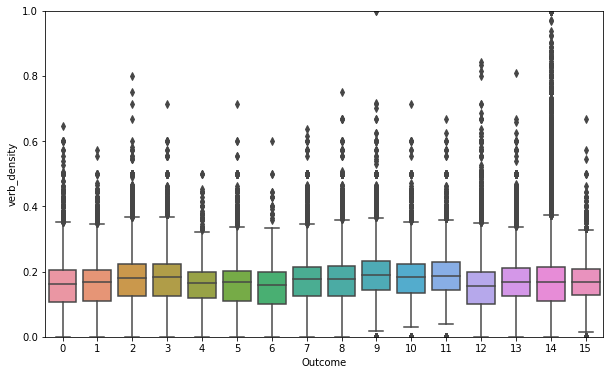

In [11]:
#plot box plots for all the features
plt_cols = ['adj_density', 'num_char_density', 'num_word_count', 'pron_density', 'verb_density']
for y in plt_cols:
    get_box_plot(df_feat, 'Outcome', y)

## Word Clouds

In [12]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

my_stopwords = {'gt', 'https', 'lt', 'need', 'one', 'question', 'quot', 'will', 'xA', 'xD'}
for word in my_stopwords:
    stopwords = STOPWORDS.add(word)

In [13]:
def combine_text(df):
    """combine text in all rows"""
    text = ''
    for i, row in enumerate(df['Text']):
        text += (' ' + row)
    return text

def get_wordcloud(text):
    """plot the word cloud"""
    wordcloud = WordCloud(background_color="white", width=1500, height=960, 
                          margin=10, stopwords=stopwords).generate(text)

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

word cloud for class  0


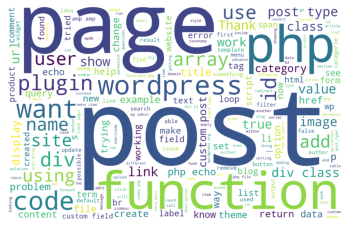

word cloud for class  1


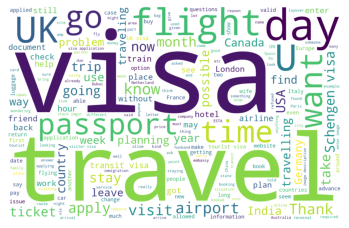

word cloud for class  2


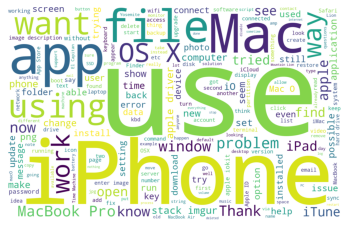

word cloud for class  3


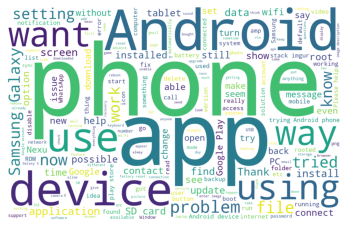

word cloud for class  4


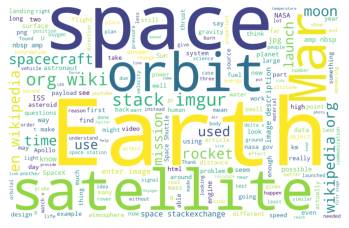

word cloud for class  5


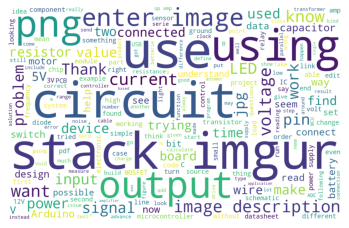

word cloud for class  6


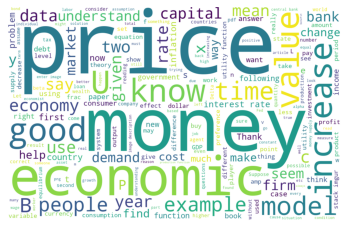

word cloud for class  7


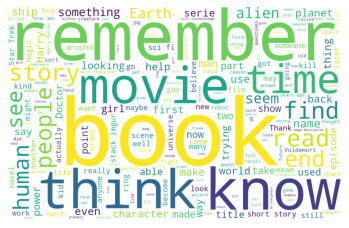

word cloud for class  8


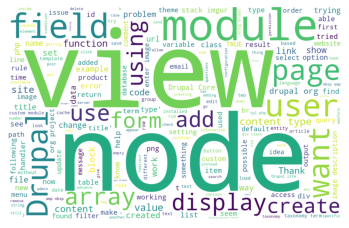

word cloud for class  9


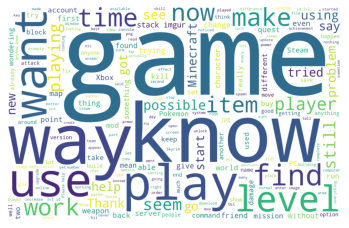

word cloud for class  10


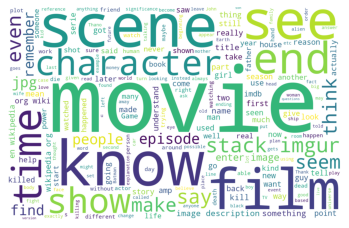

word cloud for class  11


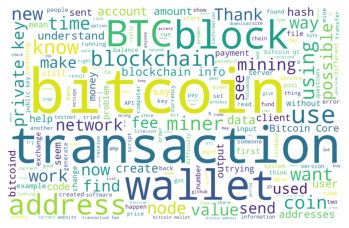

word cloud for class  12


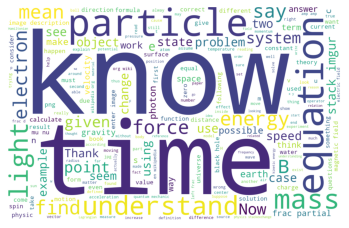

word cloud for class  13


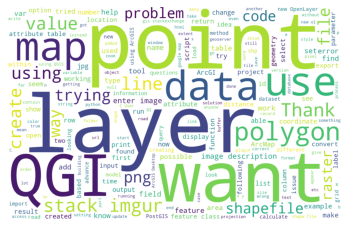

word cloud for class  14


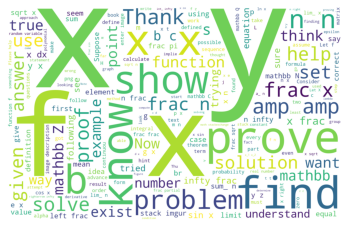

word cloud for class  15


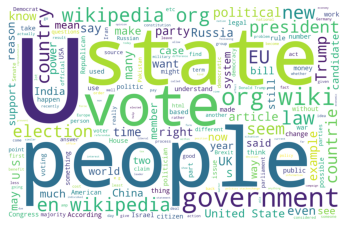

In [14]:
#plot word clouds for all the classes
df_list = [df[df.Outcome==i] for i in range(16)]
for i in range(16):
    print('word cloud for class ', i)
    get_wordcloud(combine_text(df_list[i]))

# LDA

In [15]:
from nltk.corpus import stopwords
def remove_stopwords(word_list, lang='english'):
    """Function to remove stop words"""
    lang_stopwords = stopwords.words(lang) 
    stopwords_removed = [w for w in word_list.split() if w.lower() not in lang_stopwords]
    return " ".join(stopwords_removed)

In [16]:
from sklearn import decomposition
from sklearn.feature_extraction.text import CountVectorizer

def compute_LDA(df):
    """Get the top 20 words for each topic"""
    df['Text_Clean'] = df.Text.apply(remove_stopwords)
    count_vect = CountVectorizer()
    xtrain_count = count_vect.fit_transform(df.Text_Clean)

    #train
    lda_model = decomposition.LatentDirichletAllocation(n_components=1, learning_method='online', max_iter=20)
    X_topics = lda_model.fit_transform(xtrain_count)
    topic_word = lda_model.components_
    vocab = count_vect.get_feature_names()
 
    #visualization
    n_top_words = 20
    topic_summaries = []
    for i, topic_dist in enumerate(topic_word):
        topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
        topic_summaries.append(' '.join(topic_words))
    print(topic_summaries)

In [17]:
#Get the top 20 words for each of the topics
for i in range(16):
    print('word list for class ', i)
    compute_LDA(df_list[i])

word list for class  0
['xa xd gt quot lt php post wordpress page custom class function div array id com echo wp code posts']
word list for class  1
['xa xd visa travel uk passport us would need flight get quot one time schengen airport visit days go like']
word list for class  2
['xa xd quot apple com gt mac iphone app macbook 10 os lt use using like it get would way']
word list for class  3
['xa xd android phone quot app google device com apps galaxy using samsung gt it get use like data screen']
word list for class  4
['xa xd space https quot com would earth gt http orbit could mars org wikipedia nasa launch rocket one here']
word list for class  5
['xa xd quot com voltage circuit power http lt gt would current imgur stack using use here one output https']
word list for class  6
['xa xd quot would gt price money one rate question function frac the com utility like time value know http']
word list for class  7
['xa xd quot gt one book would like remember story the time know it think 